<a href="https://colab.research.google.com/github/Leekayoung12/homework/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 쓸데없는 정보 drop
2. describe 이상수치 찾아내기(object타입일때는 barplot의 y를 종속변수와 비교)
3. value_counts()해서 정확한 수치 확인(삭제신중히. 결측치 비율이 높으면 없애는게 낫고, 높지 않고 대체할수있으면 같은 타입으로 대체)
4. 이상했던 독립변수 그래프뽑아보기
5. 거르고 걸러서 데이터 정제(숫자인 데이터는 int,float,datetime으로 무조건 바꾸고 object중 글자들 특수기호 떼고 정제)

# Netflix
### 방영일/출시일, 시청시간, 평가 횟수, 평점, 장르, 키워드, 설명 데이터로 글로벌화 여부 알아내기

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
netflix_df = pd.read_csv('/content/drive/MyDrive/KDT/과제/total_netflix_2023 new.csv')
netflix_df

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"Biography, Drama, History","persian empire,empire,5th century b.c.,achaeme...",The film follows headstrong Ginny who meets Su...
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"Comedy, Drama,Romance","producer,three word title,headstrong,arranged ...","Betrothed against her will to King George, you..."
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],"prequel,queen,historical,england,queen charlot...",A holiday romantic comedy that captures the ra...
3,Wednesday: Season 1,Yes,2022-11-23,507700000,50077.0,7.4,"['Drama', 'History', 'Romance']","christmas,coming out,holidays,lesbian relation...",The film follows headstrong Ginny who meets Su...
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,45624.0,6.6,"['Comedy', 'Romance']","telenovela,drug trafficking,cartel,femme fatal...","While fleeing from dangerous assailants, an as..."
...,...,...,...,...,...,...,...,...,...
18327,راس السنة,No,0,0,0,0,0,0,0
18328,心が叫びたがってるんだ。,No,0,0,0,0,0,0,0
18329,두근두근 내 인생,No,0,0,0,0,0,0,0
18330,라디오 스타,No,0,0,0,0,0,0,0


In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18332 entries, 0 to 18331
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                18332 non-null  object
 1   Available Globally?  18332 non-null  object
 2   Release Date         18332 non-null  object
 3   Hours Viewed         18332 non-null  object
 4   Number of Ratings    18332 non-null  object
 5   Rating               18332 non-null  object
 6   Genre                18332 non-null  object
 7   Key Words            18332 non-null  object
 8   Description          18332 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


* Title               :제목
* Available Globally? :글로벌화 여부
* Release Date        :방영일/출시일
* Hours Viewed        :시청시간
* Number of Ratings   :평가 횟수
* Rating              :평점
* Genre               :장르
* Key Words           :키워드
* Description         :설명

In [ ]:
# 종속변수: Available Globally
# Title, Description, keywords 필요없는 독립변수로 drop
netflix_df.drop(['Title', 'Description', 'Key Words'], axis=1, inplace=True)
netflix_df.head()

,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre
0,Yes,2023-03-23,812100000,7696.0,6.0,"Biography, Drama, History"
1,Yes,2023-01-05,665100000,5216.0,5.7,"Comedy, Drama,Romance"
2,Yes,2022-12-30,622800000,11869.0,8.4,['Short']
3,Yes,2022-11-23,507700000,50077.0,7.4,"['Drama', 'History', 'Romance']"
4,Yes,2023-05-04,503000000,45624.0,6.6,"['Comedy', 'Romance']"


In [ ]:
netflix_df.describe()

,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre
count,18332,18332,18332,18332,18332,18332
unique,2,1667,587,2267,82,394
top,No,0,0,11869.0,6.6,['Comedy']
freq,13798,3693,3693,500,735,1560


In [ ]:
netflix_df['Release Date']

0        2023-03-23
1        2023-01-05
2        2022-12-30
3        2022-11-23
4        2023-05-04
            ...    
18327             0
18328             0
18329             0
18330             0
18331             0
Name: Release Date, Length: 18332, dtype: object

In [ ]:
# 'Release Date' 열에서 문자열 "release date"나 값이 0인 행을 제외
netflix_df = netflix_df[(netflix_df['Release Date'] != 'Release Date') & (netflix_df['Release Date'] != '0')]

# 'Release Date' 열을 datetime 형식으로 변환
netflix_df['Release Date'] = pd.to_datetime(netflix_df['Release Date'], format='%Y-%m-%d')


<ipython-input-265-6443648cbc50>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['Release Date'] = pd.to_datetime(netflix_df['Release Date'], format='%Y-%m-%d')


In [ ]:
netflix_df['Release Date']

0       2023-03-23
1       2023-01-05
2       2022-12-30
3       2022-11-23
4       2023-05-04
           ...    
14634   2020-09-28
14635   2020-04-24
14636   2018-08-10
14637   2018-07-20
14638   2022-01-20
Name: Release Date, Length: 14637, dtype: datetime64[ns]

In [ ]:
# 컬럼 형변환
netflix_df['Hours Viewed'] = netflix_df['Hours Viewed'].astype(int)

<ipython-input-267-d876a4ce1bff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['Hours Viewed'] = netflix_df['Hours Viewed'].astype(int)


In [ ]:
# 컬럼 문자열 빼고 숫자형변환
netflix_df = netflix_df[(netflix_df['Number of Ratings'] != 'Number of Ratings')]

netflix_df['Number of Ratings'] = netflix_df['Number of Ratings'].astype(float)

<ipython-input-268-ef1d3ef5ceb8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['Number of Ratings'] = netflix_df['Number of Ratings'].astype(float)


In [ ]:
# 컬럼 형변환
netflix_df['Rating'] = netflix_df['Rating'].astype(float)

<ipython-input-269-48cd337787c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['Rating'] = netflix_df['Rating'].astype(float)


In [ ]:
# 컬럼 형변환
netflix_df['Hours Viewed'] = netflix_df['Hours Viewed'].astype(int)

<ipython-input-270-d876a4ce1bff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['Hours Viewed'] = netflix_df['Hours Viewed'].astype(int)


In [ ]:
netflix_df.isna().mean()

Available Globally?    0.0
Release Date           0.0
Hours Viewed           0.0
Number of Ratings      0.0
Rating                 0.0
Genre                  0.0
dtype: float64

In [ ]:
# 종속변수 1/0으로 변환
netflix_df['Available Globally?'] = netflix_df['Available Globally?'].apply(lambda x: 1 if x == 'Yes' else 0)
netflix_df['Available Globally?']

<ipython-input-272-156574a60a69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df['Available Globally?'] = netflix_df['Available Globally?'].apply(lambda x: 1 if x == 'Yes' else 0)


0        1
1        1
2        1
3        1
4        1
        ..
14634    0
14635    0
14636    0
14637    0
14638    0
Name: Available Globally?, Length: 14633, dtype: int64

In [ ]:
netflix_df.head()

,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre
0,1,2023-03-23,812100000,7696.0,6.0,"Biography, Drama, History"
1,1,2023-01-05,665100000,5216.0,5.7,"Comedy, Drama,Romance"
2,1,2022-12-30,622800000,11869.0,8.4,['Short']
3,1,2022-11-23,507700000,50077.0,7.4,"['Drama', 'History', 'Romance']"
4,1,2023-05-04,503000000,45624.0,6.6,"['Comedy', 'Romance']"


In [ ]:
print(netflix_df['Genre'].value_counts())

['Comedy']                              1258
['Short']                                754
['Documentary']                          651
['Drama']                                511
['Animation', 'Action', 'Adventure']     466
                                        ... 
['Action', 'Adventure']                    4
['Animation', 'Game-Show']                 4
['Fantasy', 'Horror', 'Romance']           4
Comedy, Drama,Romance                      1
Biography, Drama, History                  1
Name: Genre, Length: 393, dtype: int64


In [ ]:
# 유일한 장르 목록 추출
unique_genres = genres_split.stack().unique()

# 겹치지 않는 장르 컬럼 추가
for genre in unique_genres:
    netflix_df[genre] = genres_split.eq(genre).any(axis=1).astype(int)

<ipython-input-275-cea9655380a9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df[genre] = genres_split.eq(genre).any(axis=1).astype(int)
<ipython-input-275-cea9655380a9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df[genre] = genres_split.eq(genre).any(axis=1).astype(int)


In [ ]:
netflix_df.head(10)

,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Biography,Drama,History,Comedy,...,Animation,Documentary,Musical,Western,Music,War,Talk-Show,Reality-TV,Game-Show,News
0,1,2023-03-23,812100000,7696.0,6.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2023-01-05,665100000,5216.0,5.7,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,2022-12-30,622800000,11869.0,8.4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2022-11-23,507700000,50077.0,7.4,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2023-05-04,503000000,45624.0,6.6,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,2023-02-09,440600000,3323.0,7.9,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,2022-12-30,429600000,5216.0,5.7,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,2023-02-23,402500000,35.0,7.6,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,2021-02-24,302100000,44102.0,5.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,2023-05-25,266200000,3963.0,7.8,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 'Genre' 열 제거
netflix_df = netflix_df.drop('Genre', axis=1)

In [ ]:
netflix_df.columns

Index(['Available Globally?', 'Release Date', 'Hours Viewed',
       'Number of Ratings', 'Rating', 'Biography', 'Drama', 'History',
       'Comedy', 'Drama,Romance', 'Short', 'Romance', 'Action', 'Crime',
       'Thriller', 'Family', 'Mystery', 'Sport', 'Adventure', 'Horror',
       'Sci-Fi', 'Fantasy', 'Animation', 'Documentary', 'Musical', 'Western',
       'Music', 'War', 'Talk-Show', 'Reality-TV', 'Game-Show', 'News'],
      dtype='object')

In [ ]:
# 여기까지 데이터 전처리

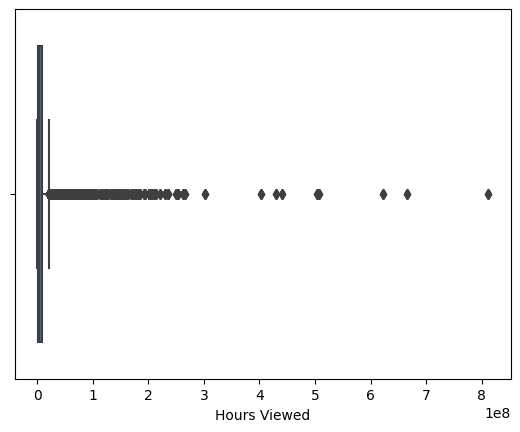

In [ ]:
# 이상치 확인,처리하기
sns.boxplot(x=netflix_df['Hours Viewed'])
plt.show()

In [ ]:
netflix_df['Hours Viewed'].value_counts()

100000       863
200000       633
400000       489
300000       450
600000       390
            ... 
18500000       3
52400000       3
18200000       3
53000000       3
812100000      3
Name: Hours Viewed, Length: 585, dtype: int64

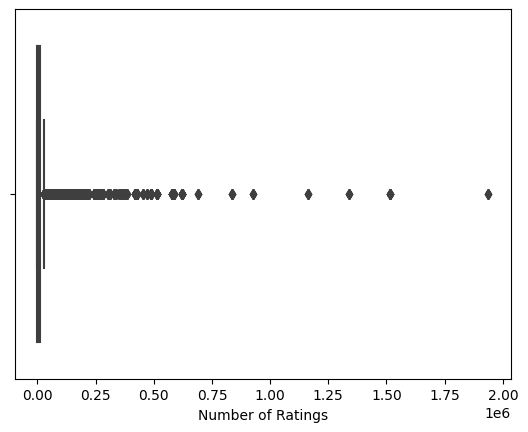

In [ ]:
sns.boxplot(x=netflix_df['Number of Ratings'])
plt.show()

In [ ]:
netflix_df['Number of Ratings'].value_counts()

11869.0     415
65.0        137
22.0         89
237.0        83
8.0          80
           ... 
182431.0      4
5524.0        4
11125.0       4
10070.0       4
23658.0       3
Name: Number of Ratings, Length: 2265, dtype: int64

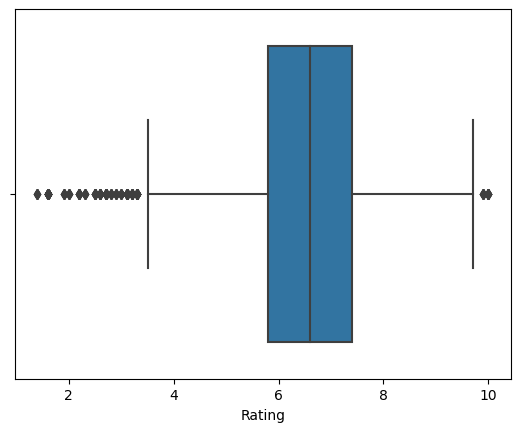

In [ ]:
sns.boxplot(x=netflix_df['Rating'])
plt.show()

In [ ]:
netflix_df['Rating'].value_counts()

6.6    601
8.4    534
6.3    532
6.5    532
6.8    529
      ... 
2.9      4
2.0      4
1.9      4
2.8      4
3.0      4
Name: Rating, Length: 80, dtype: int64

In [ ]:
# StandardScaler로 독립변수(종속변수를 제외한 컬럼) 정규화

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# StandardScaler 객체 생성
ss = StandardScaler()

# 'Release Date' 특성을 제거한 후에 스케일링
X = netflix_df.drop(['Available Globally?', 'Release Date'], axis=1)
y = netflix_df['Available Globally?']

# 모든 특성명을 문자열로 변환
X.columns = X.columns.astype(str)

Xss = ss.fit_transform(X)

In [ ]:
# train: 80%, val:20% 데이터를 분할

X_train, X_test, y_train, y_test = train_test_split(Xss, y, test_size=0.2, random_state=2023)

In [ ]:
X_train.shape, y_train.shape

((11706, 30), (11706,))

In [ ]:
X_test.shape, y_test.shape

((2927, 30), (2927,))

In [ ]:
# 모델 훈련
model = LogisticRegression()
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 모델 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7089169798428425
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      2070
           1       0.65      0.01      0.03       857

    accuracy                           0.71      2927
   macro avg       0.68      0.50      0.43      2927
weighted avg       0.69      0.71      0.59      2927



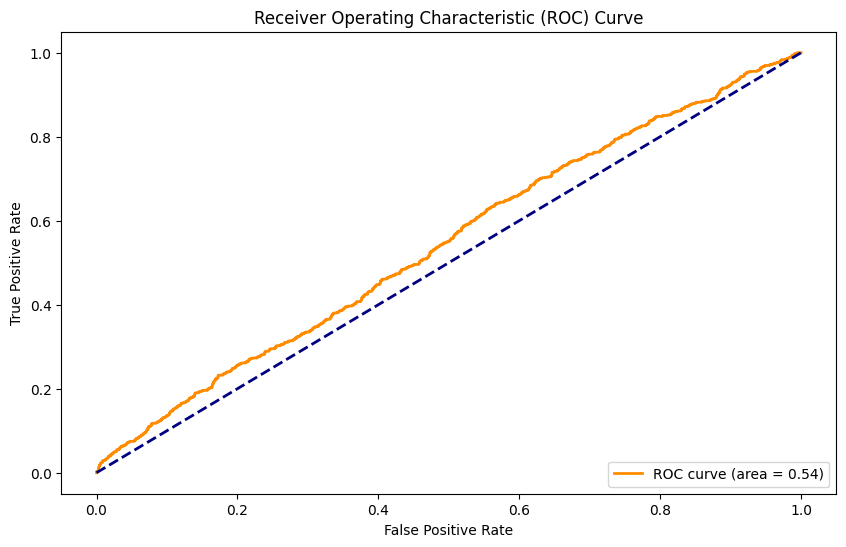

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 예측 확률 계산
y_probs = model.predict_proba(X_test)[:, 1]

# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

* 종속변수가 이진 분류 문제인 경우 로지스틱 회귀 모델이 자주 사용

* 로지스틱 회귀 모델의 결과를 시각화하는 방법 중 하나는 학습된 모델의 결정 경계(Decision Boundary)를 그려보는 것. 하지만 입력 특성이 많거나 시각화하기 어려운 경우가 많아, 실전에서는 주로 특성 중 일부를 선택하여 시각화하거나 차원 축소 기법을 활용

* ROC 커브(Receiver Operating Characteristic curve)는 이진 분류 모델의 성능을 평가하는데 사용되는 그래프
  * True Positive Rate (민감도, 재현율): 실제 양성 중에서 모델이 정확하게 양성으로 예측한 비율입니다. 실제 양성을 놓치지 않는 더 좋은 모델은 TPR이 높습니다.

  * False Positive Rate (거짓 양성 비율): 실제 음성 중에서 모델이 잘못하여 양성으로 예측한 비율입니다. FPR이 낮을수록 모델의 성능이 좋습니다.
  
  * 파란선: ROC 커브의 기준선. 이 직선은 무작위로 예측하는 경우의 ROC 커브를 나타냅니다. 즉, 모델이 아무런 정보 없이 무작위로 예측하는 경우의 성능을 의미합니다. 모델이 이 직선 위에 있어야 성능이 의미 있습니다.